In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv("adv3.csv")
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## I will use two columns, TV and Sales, TV will be independant and Sales will be dependant (predict Sales based on the TV)

In [4]:
TV = df["TV"].values
# TV

Sales = df["Sales"].values
# Sales
print(len (Sales),len (TV))

200 200


## Now will see the shape

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

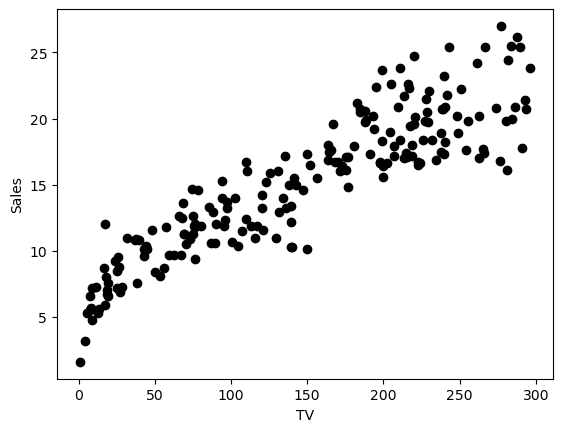

In [5]:
from matplotlib import pyplot as plt
x = TV # x: independent variable
y = Sales # y : dependent variable
plt.scatter(x,y, color='black')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.plot

### It's linear

# **** First conclusions****

### train_size=0.95 // random_state=600

## performs data reshaping, splits the data into training and testing sets, and visualizes the training data as a scatter plot.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

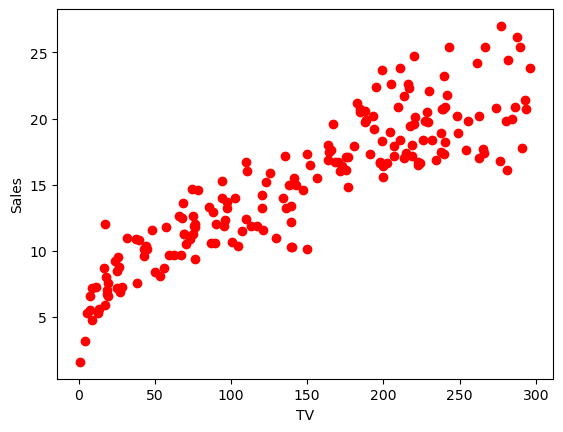

In [6]:
x = x.reshape(-1,1)
len(x)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.95, random_state=600)
#x_train
len(x_train)
#x_test
len(x_test)
plt.scatter(x_train,y_train, color='red')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.plot


##  creates a linear regression model, fits it to the training data, makes predictions on new input values, and evaluates the model's performance on the testing data using the R-squared score.

# Score

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict([[1.1],[2.2]])
y_predict
lr.score(x_test,y_test)* 100

89.9826720569105

In [8]:
y_predict = lr.predict(x_test)
y_predict


array([14.27252519, 22.62905073, 18.8771413 , 11.43933845, 19.57030932,
       20.83011469, 14.23951718,  9.05726105,  7.48938101, 13.40881583])

## visually compare the actual sales data (represented by the red scatter plot) with the predicted sales values (represented by the blue line plot) based on the TV advertising budget. 

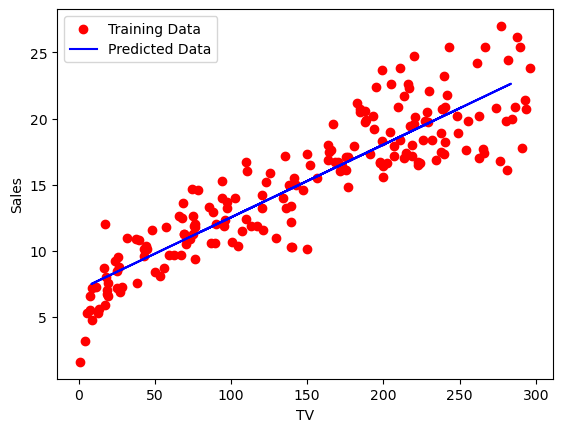

In [9]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, color='red', label='Training Data')
plt.plot(x_test, y_predict, color='blue', label='Predicted Data')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()



# **** Second conclusions****

### train_size=0.86 // random_state=300

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

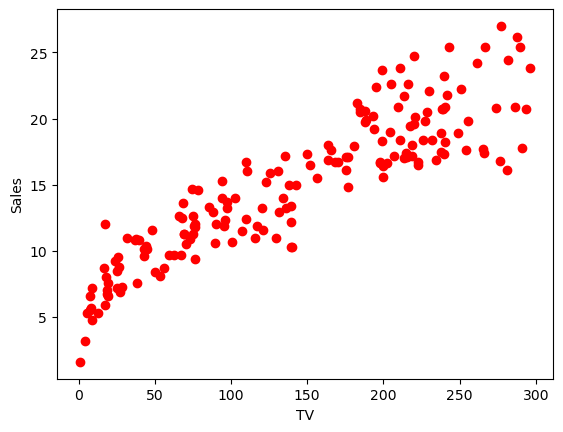

In [10]:
x = x.reshape(-1,1)
len(x)
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x,y,train_size=0.86, random_state=300)
#x2_train
len(x2_train)
#x_test
len(x2_test)
plt.scatter(x2_train,y2_train, color='red')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.plot


# Score

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x2_train,y2_train)
y2_predict = lr.predict([[1.1],[2.2]])
y2_predict
lr.score(x2_test,y2_test)* 100

78.6309405218317

In [12]:
y2_predict = lr.predict(x2_test)
y2_predict


array([23.41475546, 17.69588075, 16.33076626, 21.71819341, 19.85309871,
       19.76883239, 22.89230423, 12.83652258,  7.61762807, 11.85903319,
       22.93162852, 20.91485443, 10.19055992, 16.6509783 , 13.30279625,
       21.72942892,  7.7018944 , 15.37574789, 16.20155789, 18.58348606,
       22.70130056, 19.13964381, 14.8982387 , 19.54412218, 15.23530401,
       13.72974564, 16.58356524, 11.46579033])

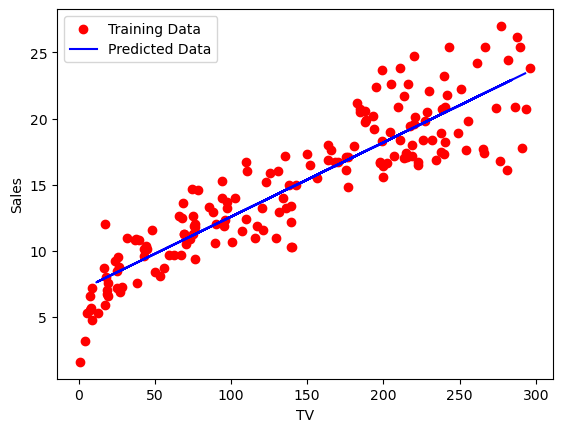

In [13]:
import matplotlib.pyplot as plt

plt.scatter(x2_train, y2_train, color='red', label='Training Data')
plt.plot(x2_test, y2_predict, color='blue', label='Predicted Data')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

# **** third conclusions****

### train_size=0.98 // random_state=200

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

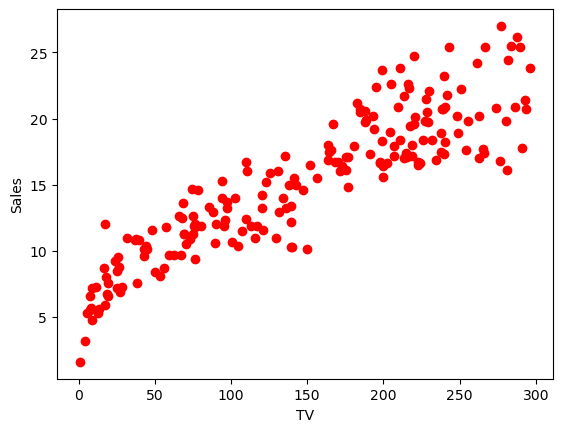

In [14]:
x = x.reshape(-1,1)
len(x)
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x,y,train_size=0.98, random_state=200)
#x3_train
len(x3_train)
#x3_test
len(x3_test)
plt.scatter(x3_train,y3_train, color='red')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.plot

# Score

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x3_train,y3_train)
y3_predict = lr.predict([[1.1],[2.2]])
y3_predict
lr.score(x3_test,y3_test)* 100

86.70280547994568

In [16]:
y3_predict = lr.predict(x3_test)
y3_predict


array([ 8.01754166, 22.77457765, 15.29323285, 11.81935432])

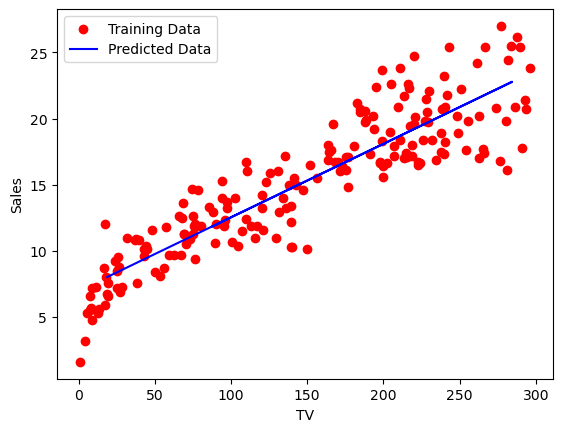

In [17]:
import matplotlib.pyplot as plt

plt.scatter(x3_train, y3_train, color='red', label='Training Data')
plt.plot(x3_test, y3_predict, color='blue', label='Predicted Data')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()